In [29]:
import tensorflow as tf
from matplotlib import pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import layers,models
import os
from tensorflow.python.ops.numpy_ops import np_config
import numpy as np
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Geting Data splited as Train(1/1)

In [7]:
training_data = tf.keras.utils.image_dataset_from_directory('dataset/train/',
    labels='inferred',
    label_mode='int',
    class_names=['millitary','other'],
    color_mode='rgb',
    batch_size=16,
    image_size=(512, 512),
    shuffle=True,
    seed=42,
    validation_split=0,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    )

Found 11170 files belonging to 2 classes.


In [10]:
validation_data = tf.keras.utils.image_dataset_from_directory(
    directory='dataset/validation/',
    labels='inferred',
    label_mode='int',
    image_size=(512, 512),
    batch_size=16,
    validation_split=0,
    seed=42
)






Found 3491 files belonging to 2 classes.


In [12]:
test_data = tf.keras.utils.image_dataset_from_directory(
    directory='dataset/test/',
    class_names=['millitary','other'],
    labels='inferred',
    label_mode='int',
    image_size=(512, 512),
    batch_size=16,
    seed=42
)

Found 2792 files belonging to 2 classes.


In [13]:
train_data_iterator = training_data.as_numpy_iterator()
train_batch = train_data_iterator.next()
train_batch[1]

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1])

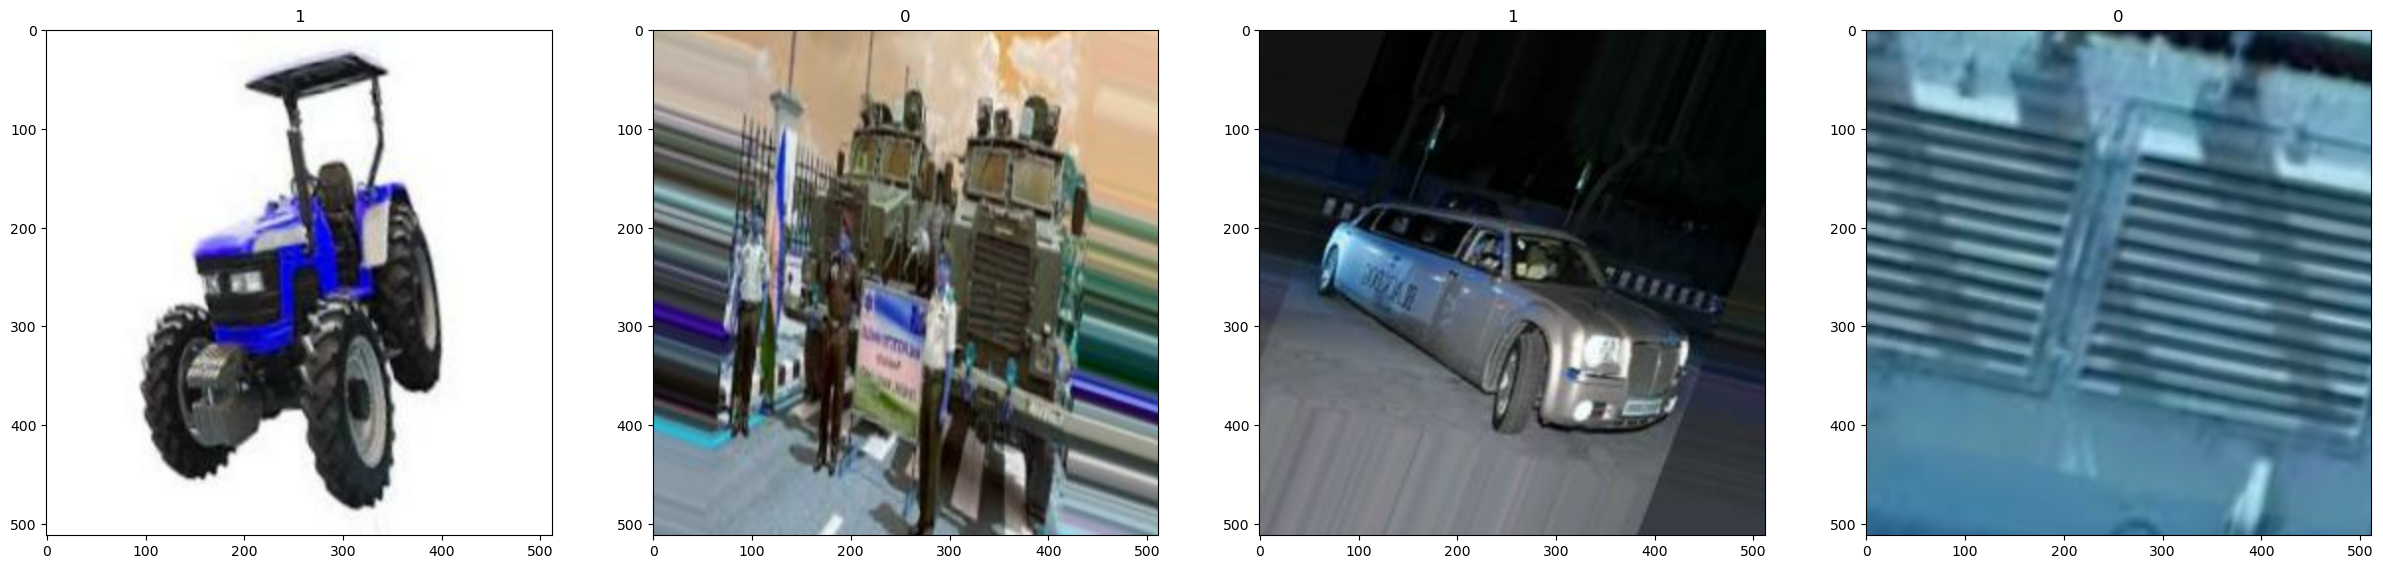

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(30,30))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

# Scale Data

In [15]:
training_data = training_data.map(lambda x,y:(x/255,y))

In [16]:
training_data.as_numpy_iterator().next()

(array([[[[9.0196079e-01, 9.0196079e-01, 9.0196079e-01],
          [9.0196079e-01, 9.0196079e-01, 9.0196079e-01],
          [9.0196079e-01, 9.0196079e-01, 9.0196079e-01],
          ...,
          [9.1764706e-01, 8.9411765e-01, 9.0196079e-01],
          [9.1764706e-01, 8.9411765e-01, 9.0196079e-01],
          [9.1764706e-01, 8.9411765e-01, 9.0196079e-01]],
 
         [[9.0196079e-01, 9.0196079e-01, 9.0196079e-01],
          [9.0196079e-01, 9.0196079e-01, 9.0196079e-01],
          [9.0196079e-01, 9.0196079e-01, 9.0196079e-01],
          ...,
          [9.1764706e-01, 8.9411765e-01, 9.0196079e-01],
          [9.1764706e-01, 8.9411765e-01, 9.0196079e-01],
          [9.1764706e-01, 8.9411765e-01, 9.0196079e-01]],
 
         [[9.0196079e-01, 9.0196079e-01, 9.0196079e-01],
          [9.0196079e-01, 9.0196079e-01, 9.0196079e-01],
          [9.0196079e-01, 9.0196079e-01, 9.0196079e-01],
          ...,
          [9.1764706e-01, 8.9411765e-01, 9.0196079e-01],
          [9.1764706e-01, 8.9411765e-

In [17]:
validation_data = validation_data.map(lambda x,y:(x/255,y))
validation_data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.8509804 , 0.93333334, 0.9529412 ],
          [0.84705

In [18]:
test_data = test_data.map(lambda x,y:(x/255,y))
test_data.as_numpy_iterator().next()

(array([[[[0.19607843, 0.33333334, 0.24705882],
          [0.19705883, 0.33431372, 0.24803922],
          [0.19901961, 0.3362745 , 0.25      ],
          ...,
          [0.5568628 , 0.5019608 , 0.30980393],
          [0.54901963, 0.49411765, 0.3019608 ],
          [0.54509807, 0.49019608, 0.29803923]],
 
         [[0.19705883, 0.33431372, 0.24803922],
          [0.19754902, 0.3348039 , 0.2485294 ],
          [0.1985294 , 0.33578432, 0.2495098 ],
          ...,
          [0.5561274 , 0.5012255 , 0.30906862],
          [0.5487745 , 0.49387255, 0.30171567],
          [0.54509807, 0.49019608, 0.29803923]],
 
         [[0.19901961, 0.3362745 , 0.25      ],
          [0.1985294 , 0.33578432, 0.2495098 ],
          [0.19754902, 0.3348039 , 0.2485294 ],
          ...,
          [0.55465686, 0.4997549 , 0.30759802],
          [0.5482843 , 0.49338236, 0.30122548],
          [0.54509807, 0.49019608, 0.29803923]],
 
         ...,
 
         [[0.29803923, 0.34117648, 0.3254902 ],
          [0.30024

# Build Model

In [19]:
res50 = ResNet50(input_shape = (512,512,3),weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 35s 0us/step


In [22]:
x = Flatten()(res50.output)

In [50]:
prediction = Dense(1, activation = 'softmax')(x)

In [51]:
modelres50 = models.Model(inputs = res50.input, outputs = prediction)


In [52]:
modelres50.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [57]:
modelres50.compile(
        optimizer='adam',
        loss=tf.losses.BinaryCrossentropy(),
        
        metrics=['acc']
    )

TypeError: Invalid keyword argument(s) in `compile()`: ({'batch_size'},). Valid keyword arguments include "cloning", "experimental_run_tf_function", "distribute", "target_tensors", or "sample_weight_mode".

In [54]:
logdir='logs'

In [55]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [59]:
history = modelres50.fit(
    training_data,
    validation_data=validation_data,
    batch_size='4',
    callbacks=[tensorboard_callback],
    epochs=5
)

Epoch 1/5


ResourceExhaustedError: Graph execution error:

Detected at node 'model_1/conv2_block2_3_bn/FusedBatchNormV3' defined at (most recent call last):
    File "C:\Users\deniz\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\deniz\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\deniz\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\deniz\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\deniz\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\deniz\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\deniz\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\deniz\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\Users\deniz\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\deniz\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\deniz\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\deniz\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\deniz\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\deniz\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\deniz\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\deniz\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\deniz\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\deniz\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\deniz\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\deniz\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\deniz\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\deniz\AppData\Local\Temp\ipykernel_8240\1686712210.py", line 1, in <module>
      history = modelres50.fit(
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 660, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "C:\Users\deniz\anaconda3\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 634, in _fused_batch_norm_training
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'model_1/conv2_block2_3_bn/FusedBatchNormV3'
OOM when allocating tensor with shape[16,256,128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_1/conv2_block2_3_bn/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_24496]

In [142]:
loss, accuracy = model.evaluate(validation_data)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

36/36 [==============================] - 2s 43ms/step - loss: 0.3121 - acc: 0.9111
Loss:  0.3120948374271393
Accuracy:  0.911149799823761


# Plot Performance

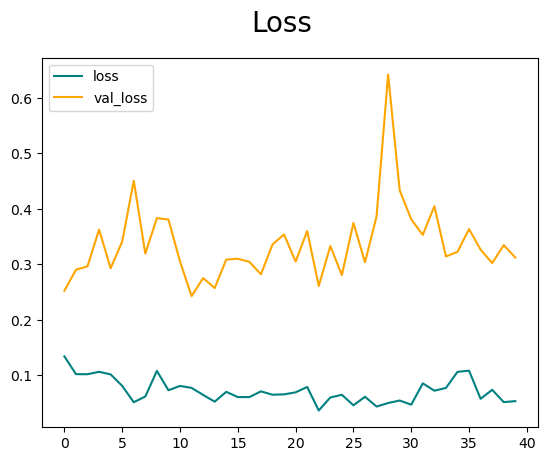

In [143]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

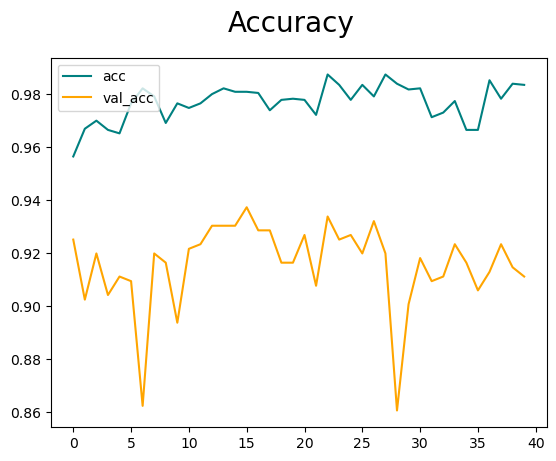

In [146]:
fig = plt.figure()
plt.plot(history.history['acc'], color='teal', label='acc')
plt.plot(history.history['val_acc'], color='orange', label='val_acc')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [49]:
import cv2
from PIL import Image
import imageio as iio

# Test;

data/Testing/glioma_tumor/image(1).jpg


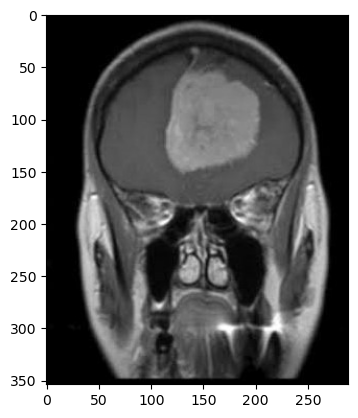

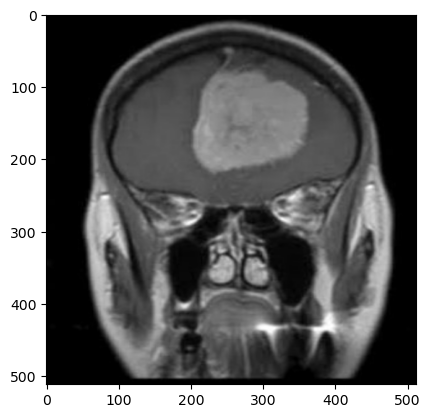

1/1 [==============================] - 0s 20ms/step
[[0. 1. 0. 0.]]


In [83]:
dizin="data/Testing"
dosyalar = os.listdir(dizin)
for imageClass in os.listdir(dizin):
    for image in os.listdir(os.path.join(dizin,imageClass)):
        imagePath=dizin+'/'+imageClass+'/'+image
        print(imagePath)
        img =cv2.imread('data/Testing/meningioma_tumor/image(65).jpg')
        plt.imshow(img)
        plt.show()
        resize = tf.image.resize(img, (512,512))
        plt.imshow(resize.numpy().astype(int))
        plt.show()
        yhat = model_predict.predict(np.expand_dims(resize, 0))
        print(yhat)
        break
    break
        



In [99]:
Label_array = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
sayac = 0
for i in yhat[0]:
    
    if(i==1.0):
        print(Label_array[sayac])
    
    sayac+=1
        

meningioma_tumor


# Save Model

In [71]:
from tensorflow.keras.models import load_model

In [148]:
model.save(os.path.join('models','first.h5'))

In [74]:
model_predict = load_model('models/first.h5')